In [2]:
%matplotlib notebook
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid
from numpy import *

In [3]:
df = pd.read_csv('ex2data1.txt', names='a,b,c'.split(','))
_X = np.array(df[['a', 'b']]).T
X = np.r_[ones((1, _X.shape[1])), _X]
y = np.array(df.c).T.reshape((1,len(df)))
n,m = _X.shape
initial_theta = zeros((n+1, 1))

<IPython.core.display.Javascript object>


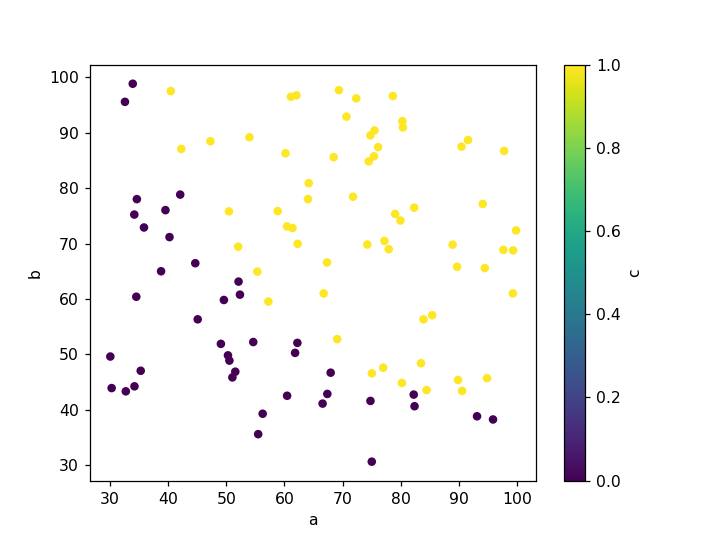

In [5]:
df.plot.scatter('a','b',c='c', cmap='viridis')

In [7]:
def h(theta, X):
    return sigmoid(dot(theta.T, X))

In [9]:
def costFunction(theta, X, y):
    m = y.shape[1]
    J = 1/m *np.sum(-y * log(h(theta, X)) - (1 - y)*log(1-h(theta, X)))    
    return J

In [49]:
def costFunctionGradient(theta, X, y):
    m = y.shape[1]
    grad = 1/m * dot((h(theta, X) - y), X.T)  
    return grad.flatten()

In [16]:
cost = costFunction(initial_theta, *[X, y])
grad = costFunctionGradient(initial_theta, *[X, y])
cost, grad

(0.69314718055994529, array([[ -0.1       , -12.00921659, -11.26284221]]))

In [72]:
from scipy.optimize import fmin_bfgs

In [149]:
costFunction(initial_theta, *(X, y))

0.6931471805599454

In [150]:
theta =  fmin_bfgs(costFunction, initial_theta, costFunctionGradient, (X, y), maxiter=400)

         Current function value: 0.263501
         Iterations: 400
         Function evaluations: 401
         Gradient evaluations: 401


<IPython.core.display.Javascript object>


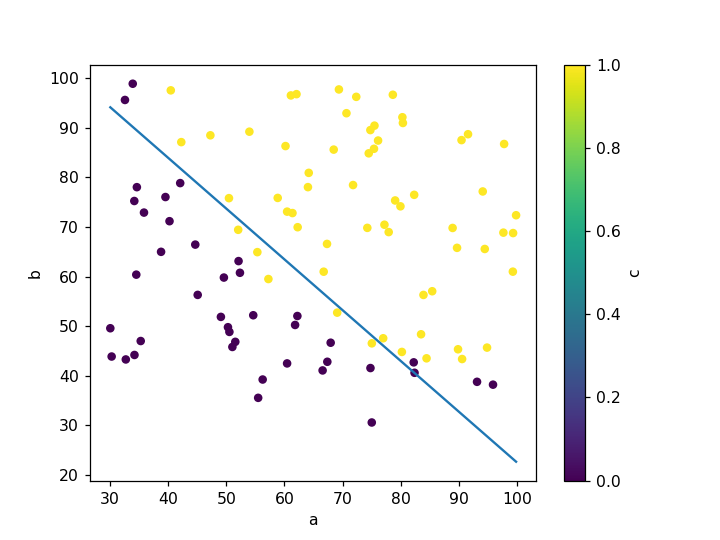

In [92]:
ax = df.plot.scatter('a','b',c='c', cmap='viridis')
dot(theta.T, X)
x_dec_bound = np.array([X[1,:].min(), X[1,:].max()])
dec_bound = -theta[0]/theta[2] - theta[1]/theta[2] * x_dec_bound
ax.plot(x_dec_bound, dec_bound)

In [88]:
def predict(theta, X):
    return (h(theta, X) >= 0.5).astype('int')

In [91]:
y_train = predict(theta, X)
perc_right = (y_train == y).sum()/y.shape[1]*100
perc_right

89.0

In [169]:
np.array(1).reshape(1, 1).shape


(1, 1)

In [170]:
def mapFeature(X1, X2):
    degree = 6
    try:
        out = ones(len(X1))
        for i in range(degree+1):
            for j in range(i+1):
                out = np.c_[out, (X1**(i-j))*(X2**j)]
        return out.T
    except TypeError:
        out = np.array(1).reshape(1, 1)
        for i in range(degree+1):
            for j in range(i+1):
                out = np.c_[out, (X1**(i-j))*(X2**j)]
        return out.T
        

In [147]:
df = pd.read_csv('ex2data2.txt', names='a,b,c'.split(','))
_X = np.array(df[['a', 'b']]).T
X = np.r_[ones((1, _X.shape[1])), _X]
X = mapFeature(X[1,:], X[2,:])
y = np.array(df.c).T.reshape((1,len(df)))
n,m = X.shape
n = n -1
initial_theta = zeros((n+1, 1))

<IPython.core.display.Javascript object>


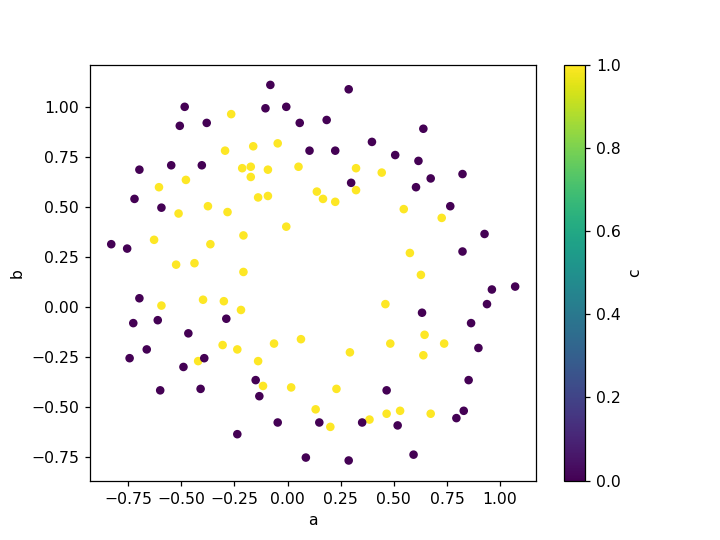

In [142]:
ax = df.plot.scatter('a', 'b', c='c', cmap = 'viridis')

In [245]:
theta =  fmin_bfgs(costFunction, initial_theta, costFunctionGradient, (X, y), maxiter=400)

         Current function value: 0.263501
         Iterations: 400
         Function evaluations: 401
         Gradient evaluations: 401


In [178]:
dot(mapFeature(1.2, 1.3).T,(theta))

array([-3124.35400424])

In [243]:
def plot_contour(ax, theta):
    u = linspace(-1, 1.5, 50)
    v = linspace(-1, 1.5, 50)

    z = zeros((len(u), len(v)))
    # Evaluate z = theta*x over the grid
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = mapFeature(u[i], v[j]).T.dot(theta)
    z = z.T
    #contour(u, v, z, [0, 0], 'LineWidth', 2)
    ax.contour(u,v,z, 0)


<IPython.core.display.Javascript object>


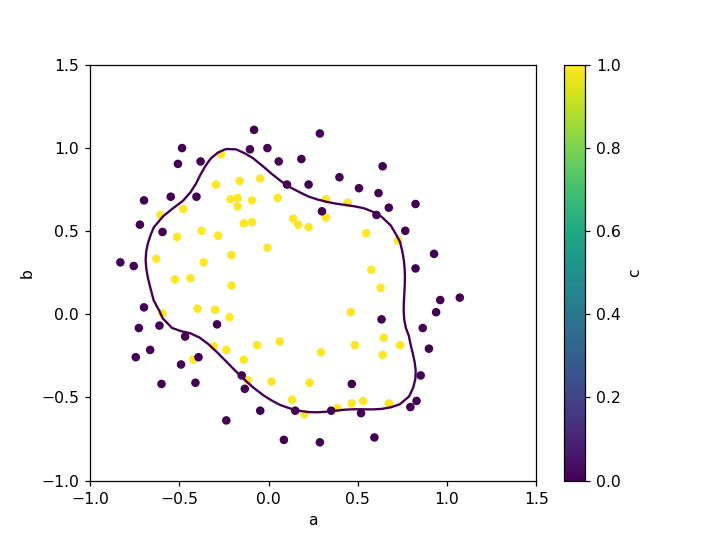

In [246]:
ax = df.plot.scatter('a', 'b', c='c', cmap = 'viridis')
plot_contour(ax, theta)


In [286]:
def costFunctionReg(theta, X, y, lam):
    m = y.shape[1]
    J = 1/m *np.sum((-y * log(h(theta, X)) - (1 - y)*log(1-h(theta, X)))) + 1.0*lam/2.0/m * np.sum(theta[1:]**2)   
    return J

In [287]:
def costFunctionGradientReg(theta, X, y, lam):
    theta = theta.flatten()
    m = y.shape[1]
    grad0 =  1/m * dot(((h(theta, X)) - y), X[0,:].reshape((1,m)).T)  
    _grad = 1/m * dot((h(theta, X) - y), X[1:,:].T) + 1.0*lam/m*theta[1:]
    return np.c_[grad0,_grad].flatten()

In [288]:
costFunctionGradientReg(initial_theta, X, y, lam)

array([  8.47457627e-03,   8.47457627e-03,   1.87880932e-02,
         7.77711864e-05,   5.03446395e-02,   1.15013308e-02,
         3.76648474e-02,   1.83559872e-02,   7.32393391e-03,
         8.19244468e-03,   2.34764889e-02,   3.93486234e-02,
         2.23923907e-03,   1.28600503e-02,   3.09593720e-03,
         3.93028171e-02,   1.99707467e-02,   4.32983232e-03,
         3.38643902e-03,   5.83822078e-03,   4.47629067e-03,
         3.10079849e-02,   3.10312442e-02,   1.09740238e-03,
         6.31570797e-03,   4.08503006e-04,   7.26504316e-03,
         1.37646175e-03,   3.87936363e-02])

Optimization terminated successfully.
         Current function value: 0.285970
         Iterations: 302
         Function evaluations: 303
         Gradient evaluations: 303


<IPython.core.display.Javascript object>


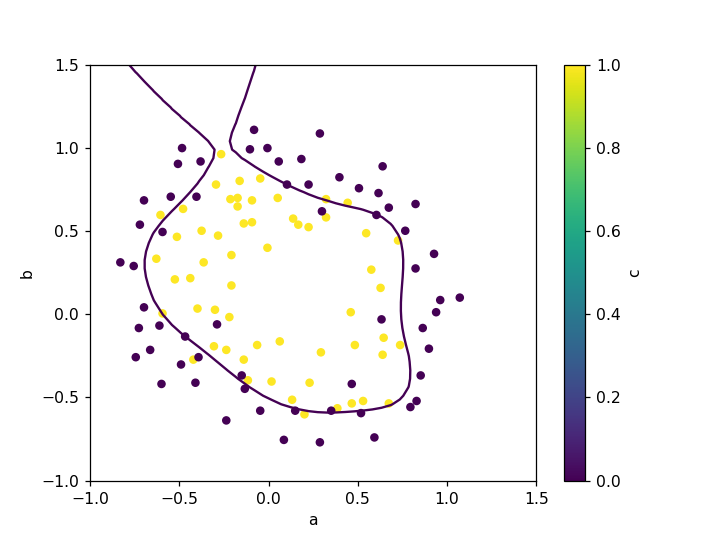

In [295]:
lam = 0.0001
theta=fmin_bfgs(costFunctionReg, initial_theta, costFunctionGradientReg, (X, y, lam))

ax = df.plot.scatter('a', 'b', c='c', cmap = 'viridis')
plot_contour(ax, theta)